<a href="https://colab.research.google.com/github/yagnik99/Play_Store_apps-data-analysis/blob/main/Yagnik_Pandya_Team_2_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Capstone Project - 1/dat/'
apps_df = pd.read_csv(working_directory + 'googleplaystore.csv')

In [ ]:
user_df=pd.read_csv(working_directory + 'googleplaystore_user_reviews.csv')

In [ ]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
user_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#check different catagories of apps
apps_df['Category'].value_counts()         #33 catagories +1 that can be ignored. Even 33 can not be done 1 by 1. So taking installs more than 25% values. 

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [ ]:
apps_df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [ ]:
#removing free & 0 rows and change to numeric. 
apps_df=apps_df[~((apps_df['Installs']=='Free') | (apps_df['Installs']=='0'))]

In [ ]:
def string_to_float(string):
  string=string.replace(',','')
  return int(string[:-1])

In [ ]:
apps_df['new_installs']=apps_df['Installs'].apply(string_to_float)

In [ ]:
apps_df['new_installs'].describe()

count    1.083900e+04
mean     1.546577e+07
std      8.503315e+07
min      0.000000e+00
25%      3.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: new_installs, dtype: float64

In [ ]:
most_installed=apps_df[apps_df['new_installs']>1.000000e+07].reset_index()        #just consideering most installed apps

In [ ]:
most_installed['new_installs'].describe()

count    8.280000e+02
mean     1.803744e+08
std      2.552320e+08
min      5.000000e+07
25%      5.000000e+07
50%      1.000000e+08
75%      1.000000e+08
max      1.000000e+09
Name: new_installs, dtype: float64

In [ ]:
most_installed['Category'].value_counts()

GAME                   241
COMMUNICATION           85
FAMILY                  75
PHOTOGRAPHY             69
PRODUCTIVITY            66
TOOLS                   60
SOCIAL                  45
SHOPPING                30
VIDEO_PLAYERS           25
PERSONALIZATION         22
TRAVEL_AND_LOCAL        21
ENTERTAINMENT           16
SPORTS                  14
NEWS_AND_MAGAZINES      11
BUSINESS                10
HEALTH_AND_FITNESS       7
BOOKS_AND_REFERENCE      7
MAPS_AND_NAVIGATION      6
FINANCE                  6
WEATHER                  5
EDUCATION                4
LIFESTYLE                2
ART_AND_DESIGN           1
Name: Category, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


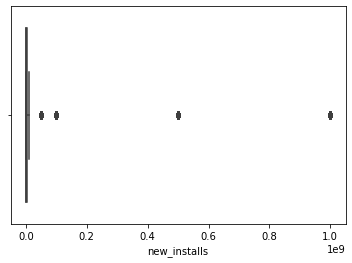

In [ ]:
sns.boxplot(apps_df['new_installs'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


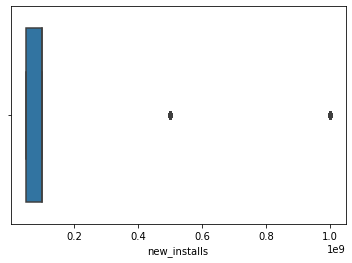

In [ ]:
sns.boxplot(most_installed['new_installs'])

In [ ]:
user_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [ ]:
user_df['Sentiment_Polarity'].describe()

count    37432.000000
mean         0.182146
std          0.351301
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

In [ ]:
user_df['Sentiment_Subjectivity'].describe()

count    37432.000000
mean         0.492704
std          0.259949
min          0.000000
25%          0.357143
50%          0.514286
75%          0.650000
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

In [ ]:
x=most_installed['new_installs'].idxmax()

In [ ]:
most_installed.loc[x]

App                 Google Play Books
Category          BOOKS_AND_REFERENCE
Rating                            3.9
Reviews                       1433233
Size               Varies with device
Installs               1,000,000,000+
Type                             Free
Price                               0
Content Rating                   Teen
Genres              Books & Reference
Last Updated           August 3, 2018
Current Ver        Varies with device
Android Ver        Varies with device
new_installs               1000000000
Name: 152, dtype: object

In [ ]:
user_df[user_df['App']==most_installed['App'][x]]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
56629,Google Play Books,NaN,NaN,NaN,NaN
56630,Google Play Books,NaN,NaN,NaN,NaN
56631,Google Play Books,NaN,NaN,NaN,NaN
56632,Google Play Books,NaN,NaN,NaN,NaN
56633,Google Play Books,NaN,NaN,NaN,NaN
56634,Google Play Books,NaN,NaN,NaN,NaN
56635,Google Play Books,NaN,NaN,NaN,NaN
56636,Google Play Books,NaN,NaN,NaN,NaN
56637,Google Play Books,NaN,NaN,NaN,NaN
56638,Google Play Books,NaN,NaN,NaN,NaN


In [ ]:
#checking other elements
most_installed.iloc[0]

App               Sketch - Draw & Paint
Category                 ART_AND_DESIGN
Rating                              4.5
Reviews                          215644
Size                                25M
Installs                    50,000,000+
Type                               Free
Price                                 0
Content Rating                     Teen
Genres                     Art & Design
Last Updated               June 8, 2018
Current Ver          Varies with device
Android Ver                  4.2 and up
new_installs                   50000000
Name: 3, dtype: object

In [ ]:
user_df[user_df['App']==most_installed['App'][0]]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [ ]:
most_installed.iloc[2]

index                             143
App                     Amazon Kindle
Category          BOOKS_AND_REFERENCE
Rating                            4.2
Reviews                        814080
Size               Varies with device
Installs                 100,000,000+
Type                             Free
Price                               0
Content Rating                   Teen
Genres              Books & Reference
Last Updated            July 27, 2018
Current Ver        Varies with device
Android Ver        Varies with device
new_installs                100000000
Name: 2, dtype: object

In [ ]:
abc=user_df[user_df['App']==most_installed['App'][2]]

In [ ]:
abc.drop('Translated_Review',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
abc.Sentiment.value_counts()

Positive    65
Negative    33
Neutral     19
Name: Sentiment, dtype: int64

In [ ]:
abc.Sentiment_Polarity.describe()

count    117.000000
mean       0.065192
std        0.321001
min       -0.805176
25%       -0.026389
50%        0.075000
75%        0.233750
max        0.800000
Name: Sentiment_Polarity, dtype: float64

In [ ]:
abc.Sentiment_Subjectivity.describe()

count    117.000000
mean       0.460117
std        0.261747
min        0.000000
25%        0.350000
50%        0.476190
75%        0.650000
max        1.000000
Name: Sentiment_Subjectivity, dtype: float64

In [ ]:
#should try to find corelation between them

In [ ]:
df1=user_df['Sentiment'].value_counts()

In [ ]:
df1

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [ ]:
temp=pd.DataFrame(apps_df['Type'].value_counts())

In [ ]:
temp

,Type
Free,10039
Paid,800
0,1


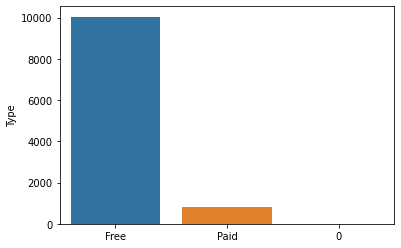

In [ ]:
sns.barplot(x=temp.index,y=temp['Type'])

Reset strategy :

First should cleanup data. Then-

*   Checking paid and free apps.

1.   There are comparitively less paid apps. Can make conclusion easily with that.
2.   Get most installed apps. Sanity check its ratings and reviews. Make a conclusion based on its Catagory. Like this sort of catagory are success if even developer wants to go for paid apps.

*   Then going with free apps. We can check how frequent app is updated. 

1.   If there is no update since long we can make a conclusion that those are may be not be in service. Even will check those but would be less prefered.
2.   Will move forward with apps those are frequently updated.

*   Free apps with frequent updates.

1.   Will further divide this in 4 DF based on their installs. 
2.   Can get which catagory is good in all groups based on ratings, reviews and size.
3. This will also lead us to which catagory has less success in current market.

*   Free apps with less updates ( for not updated within 2 years)

1.   Will directly get catagories of them based on high installs and check its revies, ratings and size.


* We will be having 3 good conclusions.
1. Paid apps. 
2. For free apps. 
3. For free outdated apps.













